# ***Tree***


---


# **Decision Tree Classifier**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
hr = pd.read_csv("/content/drive/MyDrive/KP_Module/Practical Machine Learning/Practise/Cases/human-resources-analytics/HR_comma_sep.csv")

dum_hr = pd.get_dummies(hr,drop_first=True)

X = dum_hr.drop("left",axis=1)
y = dum_hr['left']


X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=23,
                                                 stratify=y)


dtc = DecisionTreeClassifier(random_state=23,max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=23)

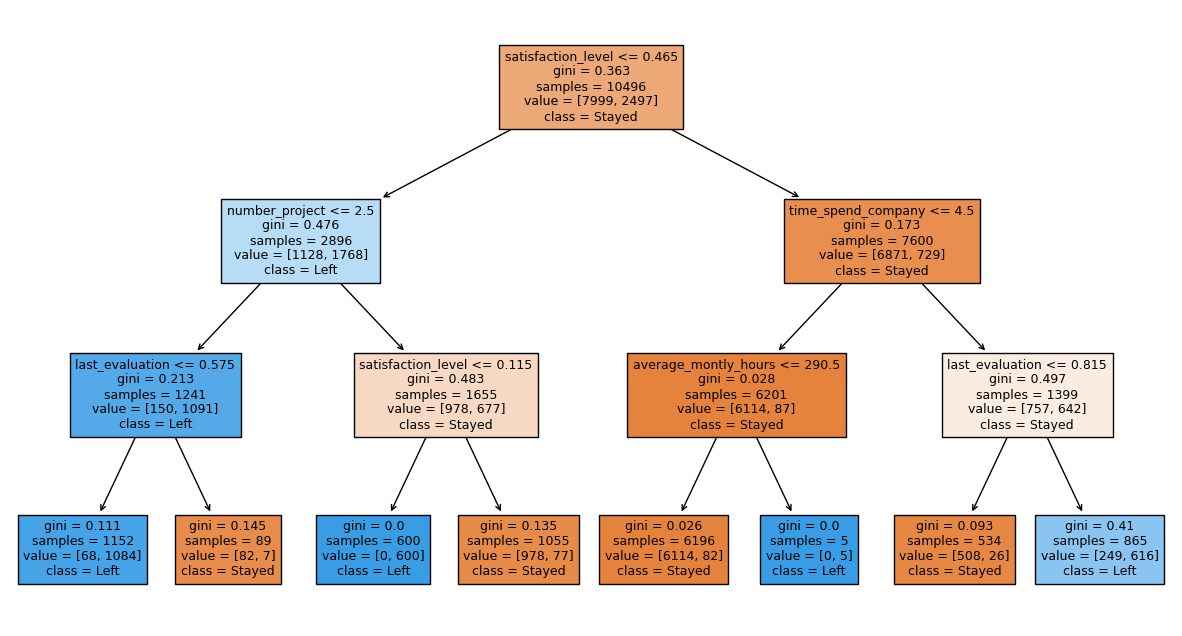

In [3]:
plt.figure(figsize=(15,8))
plot_tree(dtc,feature_names=X_train.columns,class_names=['Stayed','Left'],filled=True,fontsize=9)
plt.show()

In [6]:
y_pred = dtc.predict(X_test)
y_pred_prob = dtc.predict_proba(X_test)[:,1]

print(log_loss(y_test,y_pred_prob))

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

params = {"max_depth":[2,3,4,5,6,None]}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

0.14851747591586703
{'max_depth': 6}
-0.11458681615740332


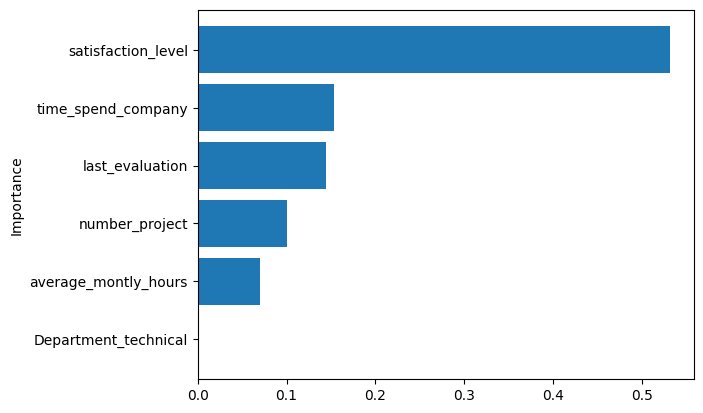

In [7]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_,'importance':best_model.feature_importances_})

df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

# ***Tuning Using Hyper Parameters Min_samples_split and min_samples_leaf***


In [8]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

params = {"max_depth":[2,3,4,5,6,None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,3,5,7,10,15]}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10}
-0.10757957256759484


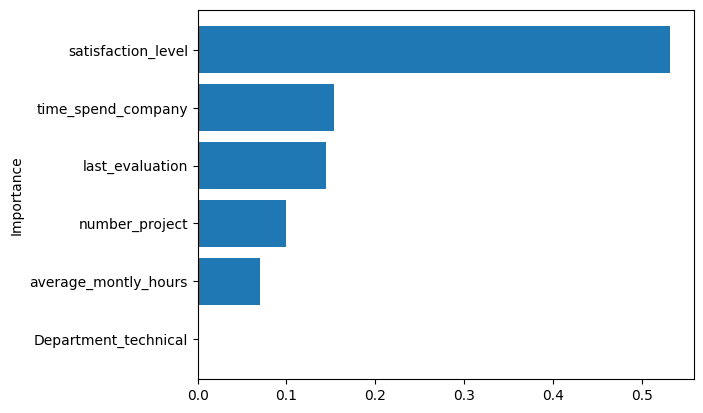

In [9]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_,'importance':best_model.feature_importances_})

df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

# ***Decision Tree Regressor***

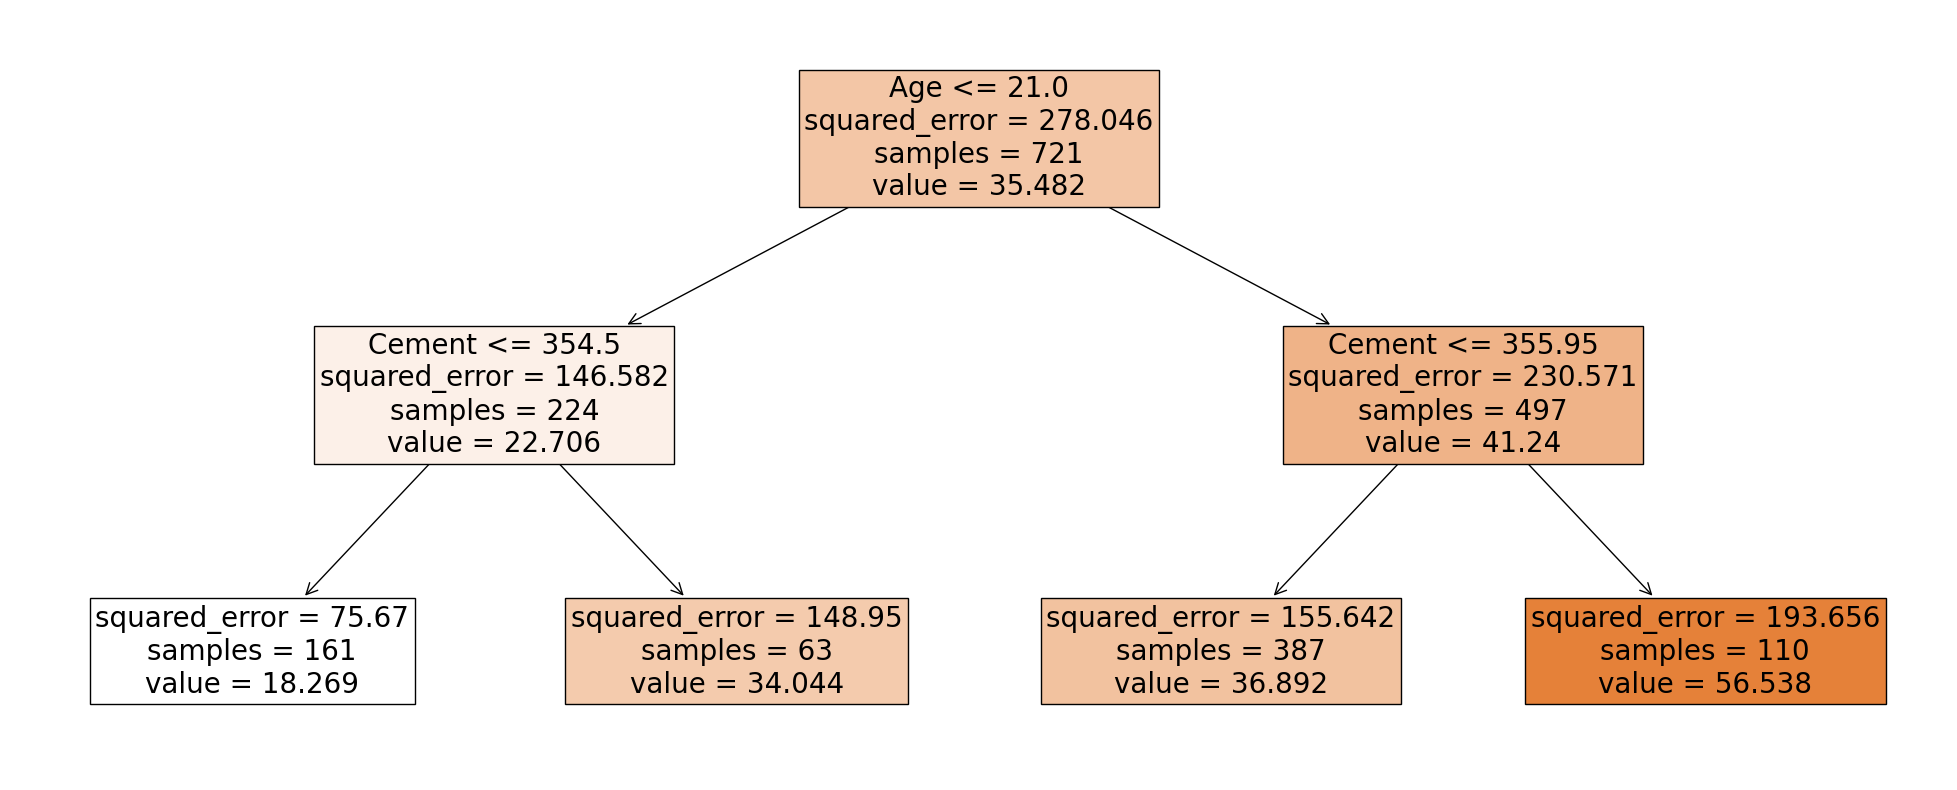

In [3]:
from sklearn.tree import DecisionTreeRegressor
concrete = pd.read_csv("/content/drive/MyDrive/KP_Module/Practical Machine Learning/Practise/Cases/Concrete Strength/Concrete_Data.csv")
X = concrete.drop('Strength',axis = 1)
y = concrete['Strength']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

dtr = DecisionTreeRegressor(max_depth=2,random_state=23)

dtr.fit(X_train,y_train)

plt.figure(figsize=(25,10))
plot_tree(dtr,feature_names=X_train.columns,filled=True,fontsize=20)
plt.show()

In [4]:
from sklearn.model_selection import KFold,GridSearchCV


kfold = KFold(n_splits=5,shuffle=True,random_state=23)
params = {"max_depth":[2,3,4,5,6,None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,3,5,7,10,15]}

gcv = GridSearchCV(dtr,param_grid=params,cv=kfold,scoring='r2')
gcv.fit(X,y)

print('Best Parameters : ',gcv.best_params_)
print('Best Score : ',gcv.best_score_)

Best Parameters :  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :  0.8423769153142352


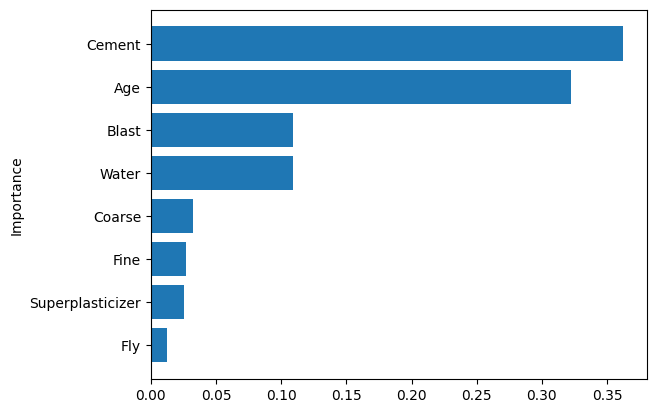

In [5]:
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'variable':best_model.feature_names_in_,'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.show()